In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 3)

In [2]:
plt.rcParams.update({
    'font.family': 'serif',  # You can specify your desired serif font
    'font.size': 8
})

In [489]:
## importing data
data = pd.read_csv('/Users/gloriacarrascal/trabajo-grado/data/merged_allvariablesby3h_from2012.csv', parse_dates=['Datetime'])
data.head()


,Datetime,altitud,longitud,latitud,dirviento,nubosidad,temperatura,vapor,velviento,rocio,irradiancia
0,2012-01-01 07:00:00,42.560000,-74.343289,10.559191,161.120000,1.271186,24.296610,27.433599,3.430000,22.649298,33.050609
1,2012-01-01 13:00:00,40.444444,-74.375617,10.585753,186.666667,1.237288,31.126984,27.702273,3.731481,22.718630,804.710910
2,2012-01-01 19:00:00,40.444444,-74.375617,10.585753,200.000000,1.339286,27.030189,29.002635,3.322222,23.558754,0.000000
3,2012-01-02 07:00:00,45.250000,-74.233066,10.603066,184.687500,1.396825,24.031746,26.904756,3.354167,22.185775,30.728267
4,2012-01-02 13:00:00,45.250000,-74.233066,10.603066,180.937500,1.451613,30.795522,27.581943,3.208333,22.618879,721.938525


In [490]:
_data2018 = data[data.Datetime.dt.year==2018].set_index('Datetime')
target = _data2018.irradiancia
features = _data2018[['altitud', 'longitud', 'latitud', 'dirviento', 'nubosidad', 'temperatura', 'vapor', 'velviento', 'rocio']]

In [491]:
scaler = StandardScaler()
target_var = target.values.reshape(-1, 1)
scaled_target_var =  scaler.fit_transform(target_var)
scaled_features_var = scaler.fit_transform(features)
scaled_target_var_df = pd.DataFrame(scaled_target_var, columns=['irradiancia'], index=target.index)
scaled_features_var_df = pd.DataFrame(scaled_features_var, columns=features.columns, index= features.index)
for train_index, test_index in tss.split(scaled_features_var):
    X_train, X_test = scaled_features_var_df.iloc[train_index, :], scaled_features_var_df.iloc[test_index,:]
    y_train, y_test = scaled_target_var_df.iloc[train_index], scaled_target_var_df.iloc[test_index]

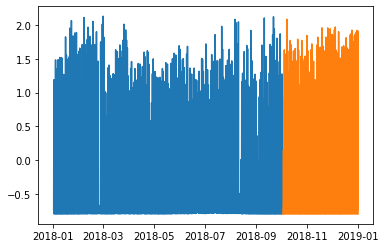

In [492]:
plt.plot(y_train)
plt.plot(y_test)

In [493]:
#train-test split
#X_train, X_test, y_train, y_test = train_test_split(scaled_features_var_df[['altitud', 'longitud', 'latitud','dirviento', 'nubosidad', 'temperatura', 'vapor', 'velviento','rocio']], scaled_target_var_df, test_size=0.3, random_state=42)

In [494]:
regressor = SVR(kernel = 'rbf')
model = regressor.fit(X=X_train, y=y_train)
y_pred = regressor.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [495]:
# # evaluate the model
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error (MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Root Squared Error (RMSE): {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R squared (R2): {r2}")

Mean Squared Error (MSE): 0.2705205228148087
Root Squared Error (RMSE): 0.5201158744114707
Mean Absolute Error (MAE): 0.34893397202206294
R squared (R2): 0.7678891609097296


In [496]:

# Calculate the R-squared score
# r_squared = r2_score(y_test, y_pred)

# # Create a scatter plot of true vs. predicted values
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, c='brown', label=f'SVR')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='black', label='Predicción Perfecta')
# plt.xlabel('Valores Verdaderos', fontsize=14)
# plt.ylabel('Predicciones', fontsize=14)
# #plt.title(f'R = {r_squared:.2f}')
# plt.legend()
# #plt.savefig(f'/Users/gloriacarrascal/trabajo-grado/graficas/r_squared_CONVFNN.png')
# plt.show()

In [497]:
regressor3 = DecisionTreeRegressor(max_depth=5)
regressor3.fit(X=X_train, y=y_train)
y_pred3 = regressor3.predict(X_test)


In [498]:
# # evaluate the model
mse = mean_squared_error(y_test,y_pred3)
print(f"Mean Squared Error (MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Root Squared Error (RMSE): {rmse}")
mae = mean_absolute_error(y_test, y_pred3)
print(f"Mean Absolute Error (MAE): {mae}")
r2 = r2_score(y_test, y_pred3)
print(f"R squared (R2): {r2}")

Mean Squared Error (MSE): 0.09913986672408168
Root Squared Error (RMSE): 0.3148648388183121
Mean Absolute Error (MAE): 0.16319746555334072
R squared (R2): 0.9149364439592733


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Importance'>

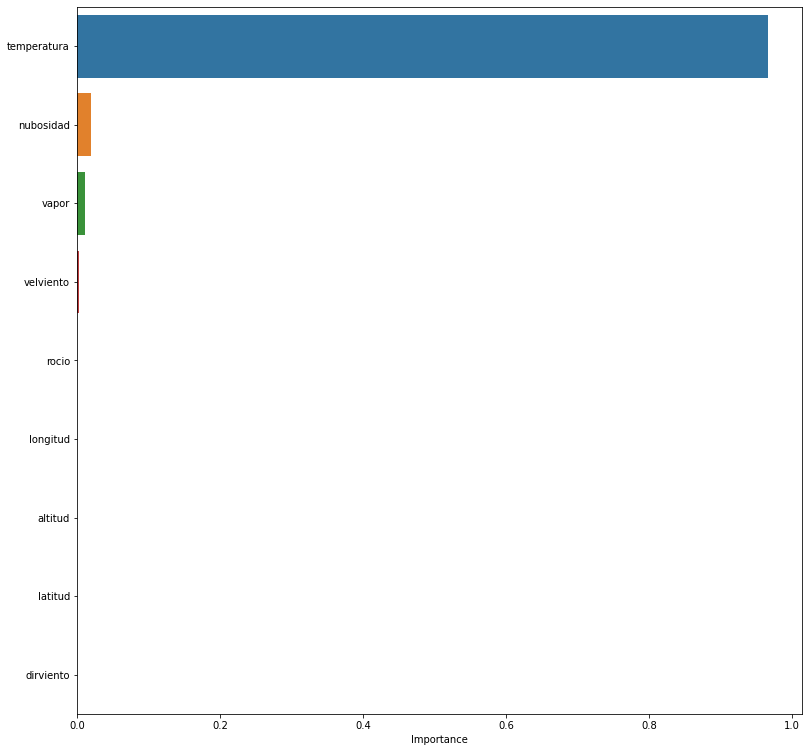

In [466]:
importances = regressor3.feature_importances_

columns = X_test.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

In [500]:
_X_test_transformed= scaler.inverse_transform(X_test)
original_test = pd.DataFrame(_X_test_transformed, index=X_test.index, columns=X_test.columns)
data_svr = pd.DataFrame({
    'actual_irradiation': y_test.values.flatten(),
    'predicted_irradiation': y_pred,
    'temperature': original_test['temperatura'].values,
    'cloud_cover': original_test['nubosidad'].values,
}, index=y_test.index)
data_rt = pd.DataFrame({
    'actual_irradiation': y_test.values.flatten(),
    'predicted_irradiation': y_pred3,
    'temperature': original_test['temperatura'].values,
    'cloud_cover': original_test['nubosidad'].values
}, index=y_test.index)


In [502]:

# Binning based on temperature
temperature_bins = np.linspace(data_rt['temperature'].min(), data_rt['temperature'].max(), 6)
data_rt['temp_bin'] = pd.cut(data_rt['temperature'], bins=temperature_bins, labels=False)+1

# Group by temperature bins and calculate mean errors
grouped_data_rt = data_rt.groupby('temp_bin').mean()
grouped_data_rt['error_probability'] = (abs(grouped_data_rt['actual_irradiation'] - grouped_data_rt['predicted_irradiation']) / abs(grouped_data_rt['actual_irradiation'])) * 100


# Binning based on temperature
temperature_bins = np.linspace(data_svr['temperature'].min(), data_svr['temperature'].max(), 6)
data_svr['temp_bin'] = pd.cut(data_svr['temperature'], bins=temperature_bins, labels=False)+1

# Group by temperature bins and calculate mean errors
grouped_data_svr = data_svr.groupby('temp_bin').mean()
grouped_data_svr['error_probability'] = (abs(grouped_data_svr['actual_irradiation'] - grouped_data_svr['predicted_irradiation']) / abs(grouped_data_svr['actual_irradiation'])) * 100


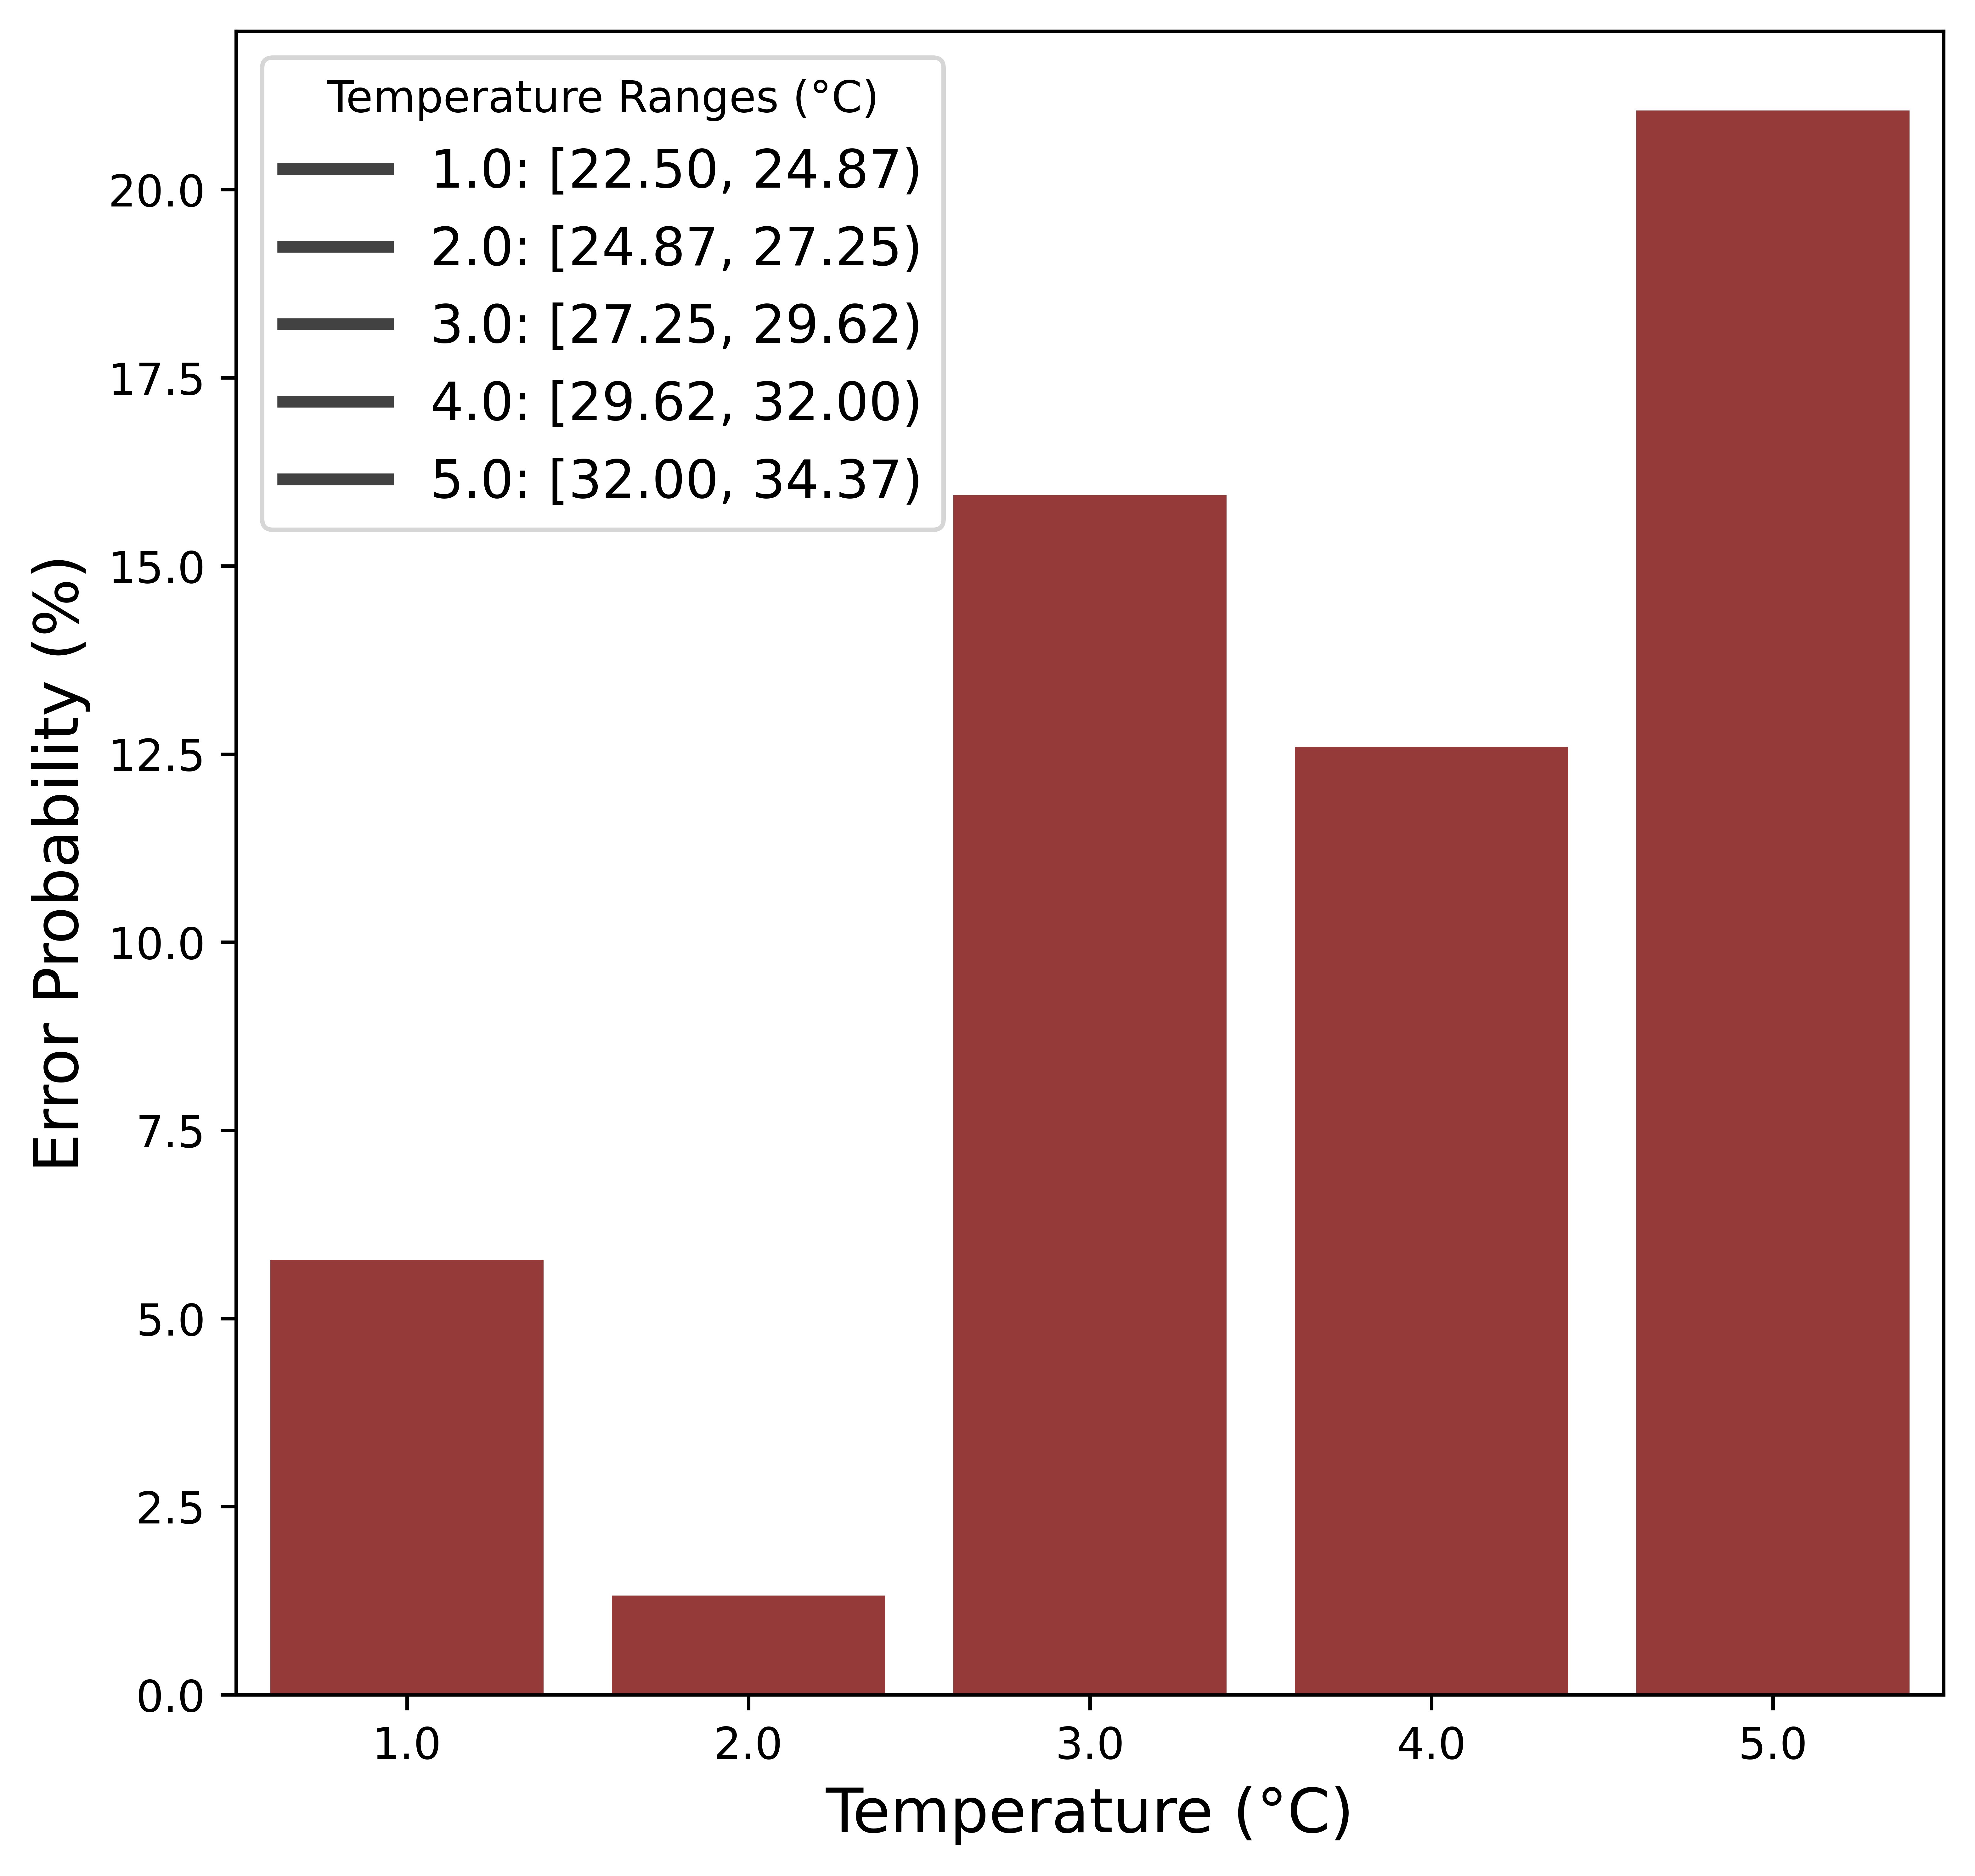

In [503]:
plt.figure(figsize=(7, 7), dpi=1000)
sns.barplot(x=grouped_data_rt.index, y='error_probability', data=grouped_data_rt, color='brown')
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Error Probability (%)', fontsize=14)
# Manually set legend labels based on index values
legend_labels = {1: '[22.50, 24.87)', 2: '[24.87, 27.25)', 3: '[27.25, 29.62)', 4: '[29.62, 32.00)', 5: '[32.00, 34.37)'}
legend_labels_list = [f"{i}.0: {legend_labels[i]}" for i in range(1, 6)]

# Add legend manually
ax = plt.gca()
ax.legend(title='Temperature Ranges (°C)', labels=legend_labels_list, loc='upper left', fontsize=12)
#plt.ylim((0,24))
# Add legend
#plt.legend(title='Temperature Ranges (°C)', labels=legend_labels_list, loc='upper left', fontsize=10)
#plt.title('Error Probability Across Temperature Conditions')
plt.savefig('/Users/gloriacarrascal/trabajo-grado/graficas/temperature_error_rt_English_2018.png')

plt.show()

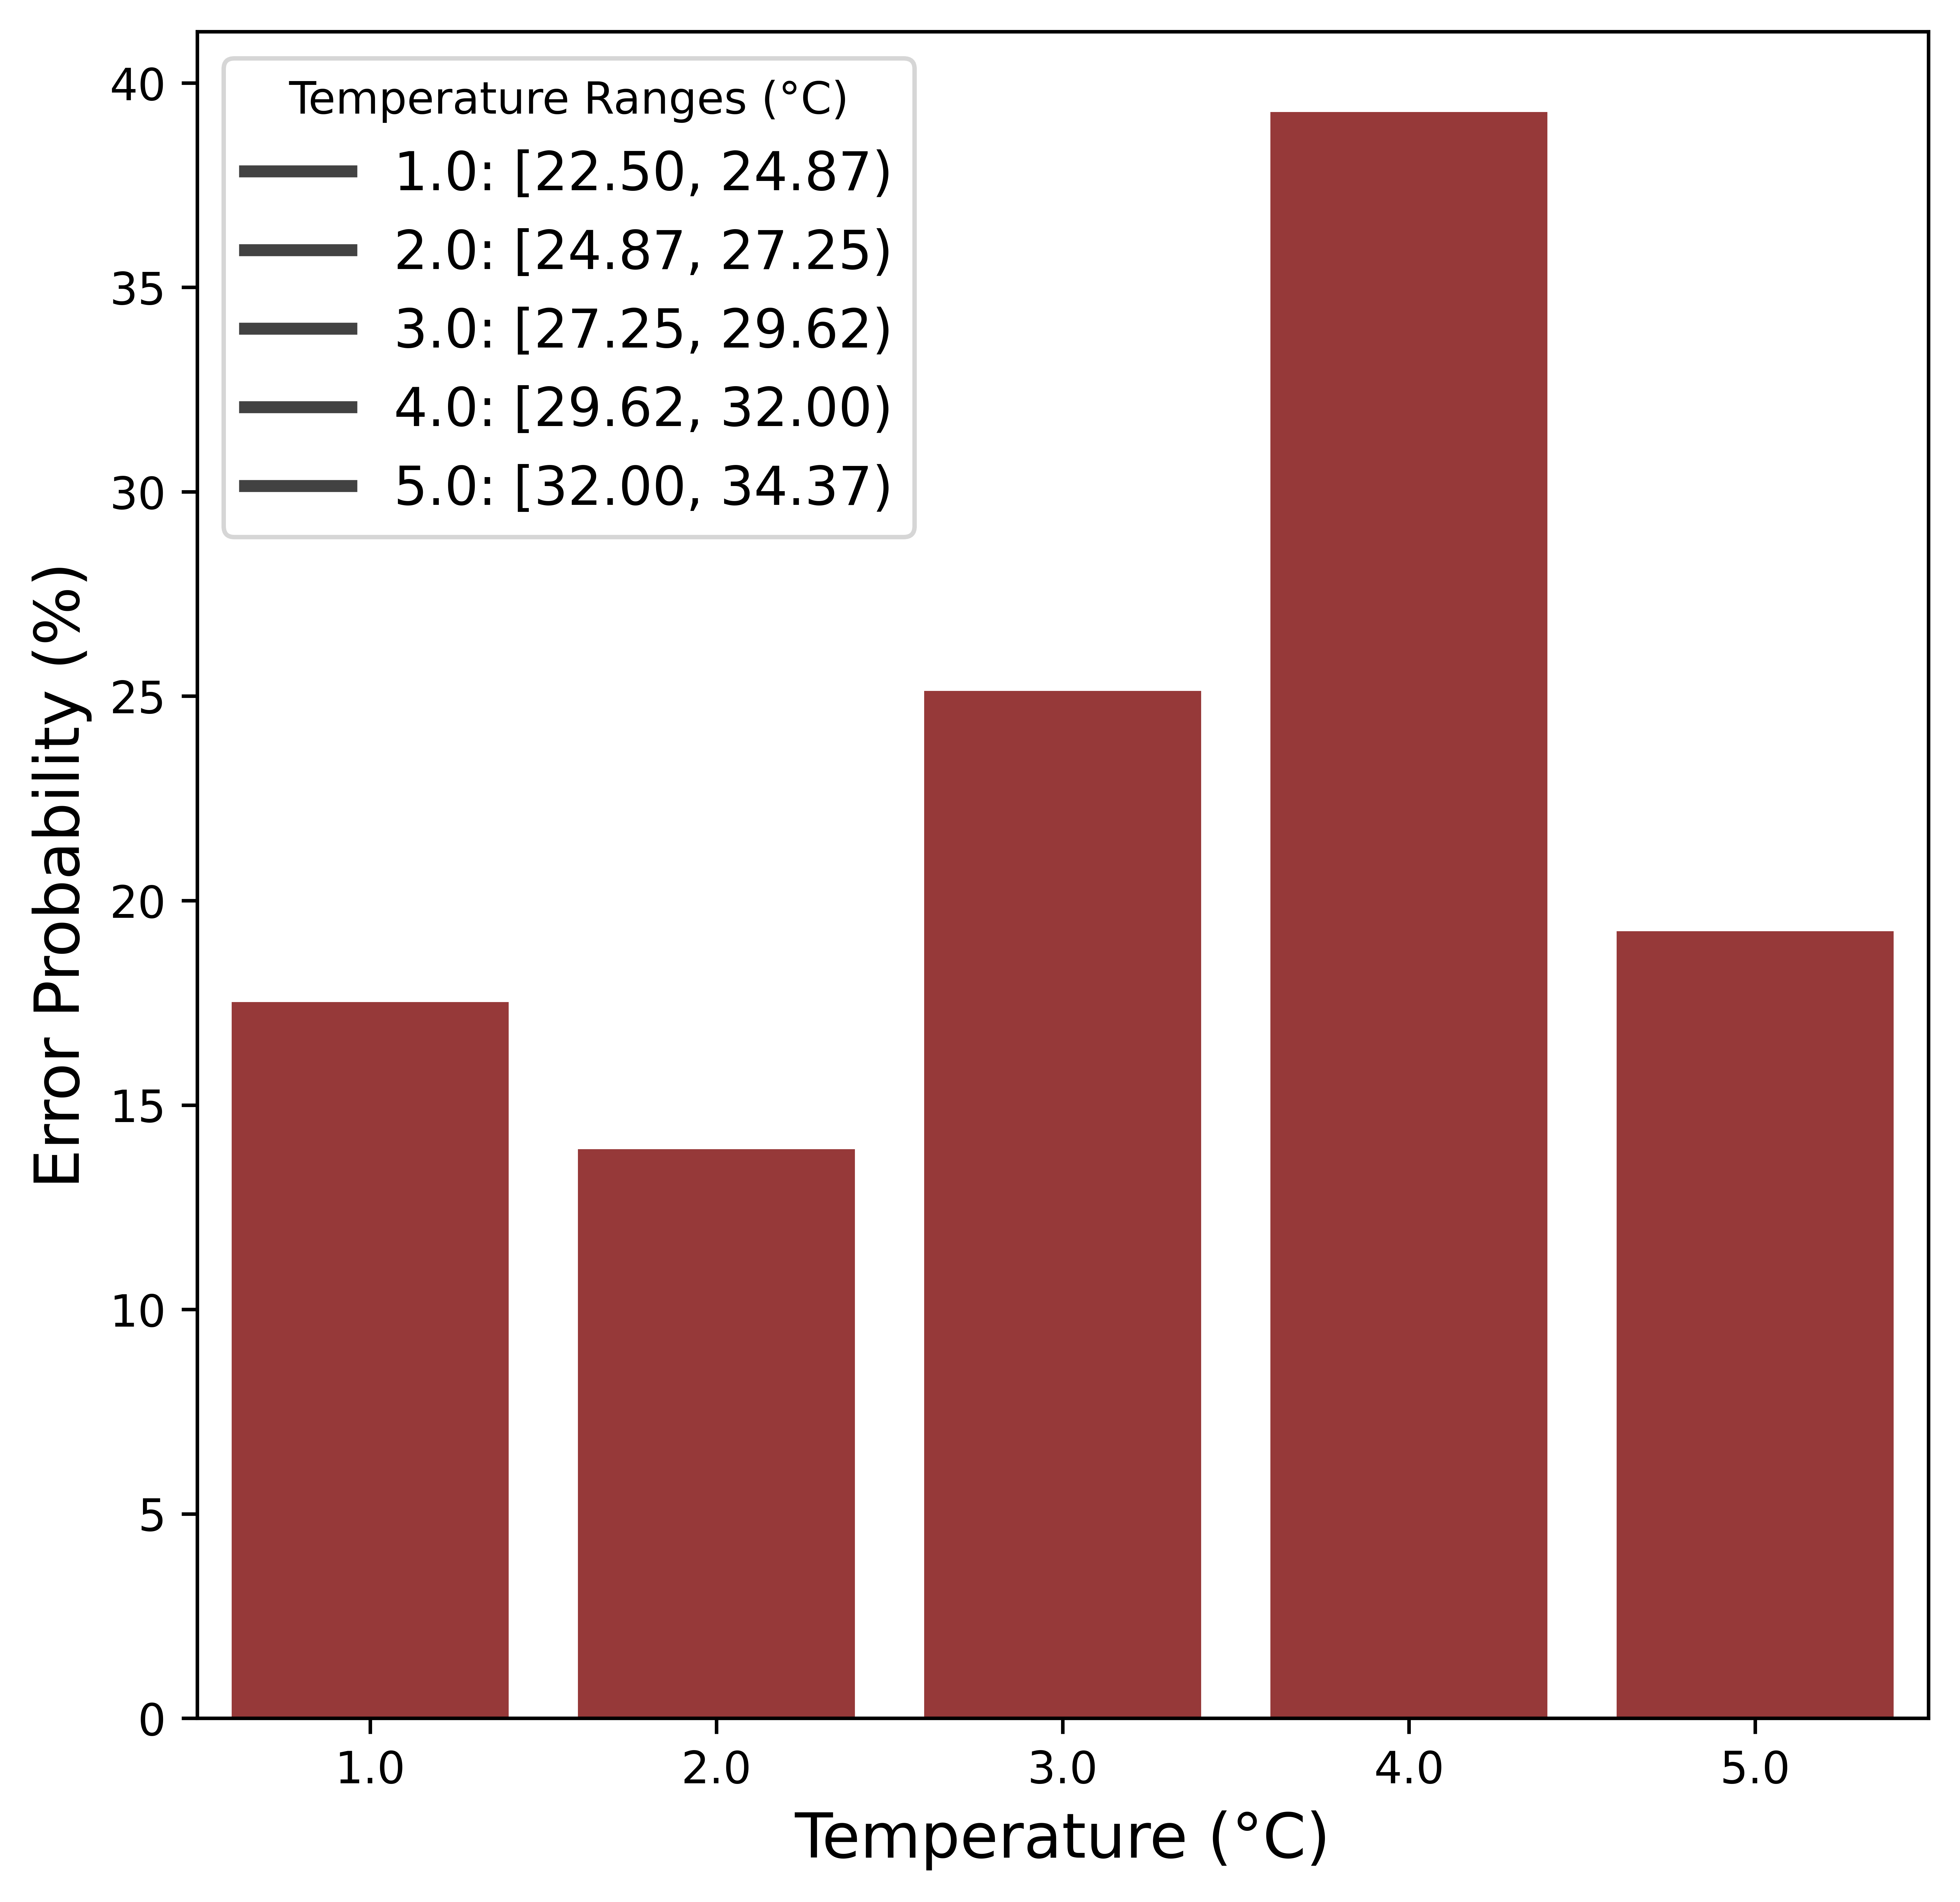

In [476]:
plt.figure(figsize=(7, 7), dpi=1000)
sns.barplot(x=grouped_data_svr.index, y='error_probability', data=grouped_data_svr, color='brown')
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Error Probability (%)', fontsize=14)
# Manually set legend labels based on index values
legend_labels = {1: '[22.50, 24.87)', 2: '[24.87, 27.25)', 3: '[27.25, 29.62)', 4: '[29.62, 32.00)', 5: '[32.00, 34.37)'}
legend_labels_list = [f"{i}.0: {legend_labels[i]}" for i in range(1, 6)]

# Add legend manually
ax = plt.gca()
ax.legend(title='Temperature Ranges (°C)', labels=legend_labels_list, loc='upper left', fontsize=12)
#plt.ylim((0,60))
# Add legend
#plt.legend(title='Temperature Ranges (°C)', labels=legend_labels_list, loc='upper left', fontsize=10)
#plt.title('Error Probability Across Temperature Conditions')
plt.savefig('/Users/gloriacarrascal/trabajo-grado/graficas/temperature_error_svr_English_2018.png')

plt.show()

In [504]:
#cloud cover 
cloud_bins2 = np.linspace(data_rt['cloud_cover'].min(), data_rt['cloud_cover'].max(), 6)
data_rt['cloud_bin'] = pd.cut(data_rt['cloud_cover'], bins=cloud_bins2, labels=False)+1
cloud_cover_rt = data_rt.groupby('cloud_bin').mean()
cloud_cover_rt['error_probability'] = (abs(cloud_cover_rt['actual_irradiation'] - cloud_cover_rt['predicted_irradiation']) / abs(cloud_cover_rt['actual_irradiation'])) * 100
grouped_cloud_cover_rt = cloud_cover_rt.sort_values(by = 'error_probability', ascending = False)

#cloud cover for SVR
cloud_bins2 = np.linspace(data_svr['cloud_cover'].min(), data_svr['cloud_cover'].max(), 6)
data_svr['cloud_bin'] = pd.cut(data_svr['cloud_cover'], bins=cloud_bins2, labels=False)+1
cloud_cover_svr = data_svr.groupby('cloud_bin').mean()
cloud_cover_svr['error_probability'] = (abs(cloud_cover_svr['actual_irradiation'] - cloud_cover_svr['predicted_irradiation']) / abs(cloud_cover_svr['actual_irradiation'])) * 100
grouped_cloud_cover_svr = cloud_cover_svr.sort_values(by = 'error_probability', ascending = False)

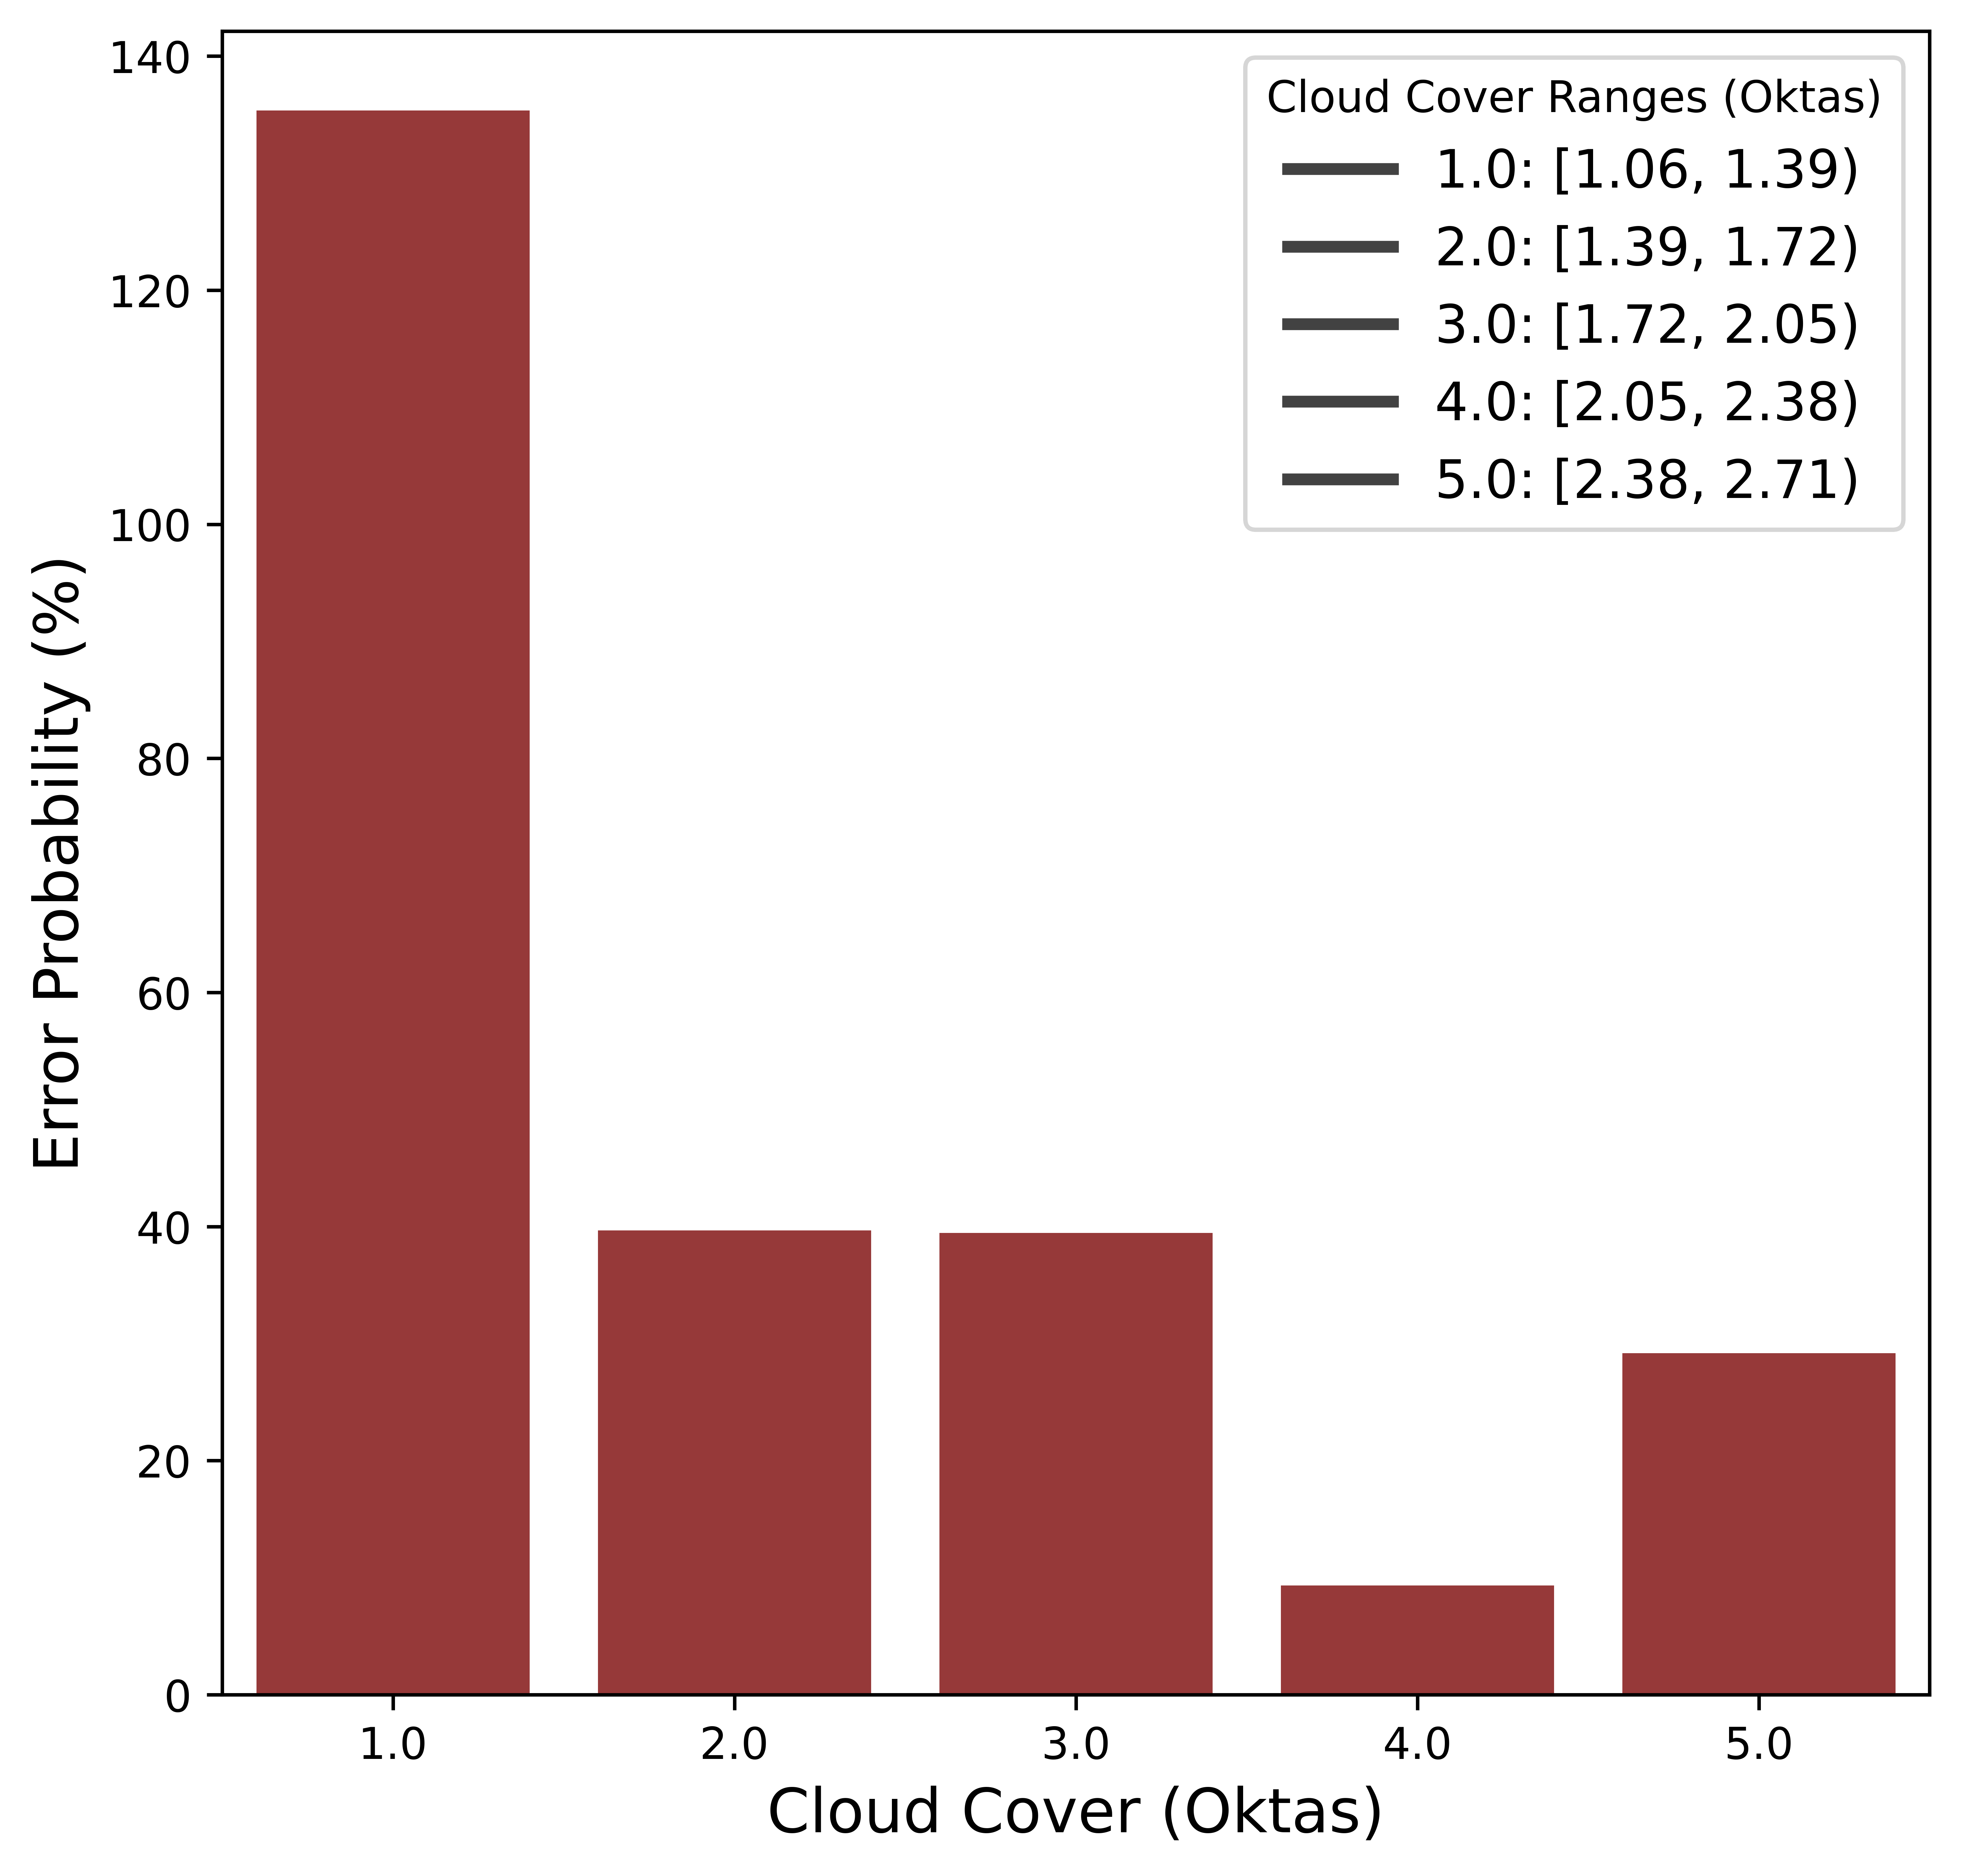

In [505]:
plt.figure(figsize=(7, 7), dpi=1000)
sns.barplot(x=grouped_cloud_cover_rt.index, y='error_probability', data=grouped_cloud_cover_rt, color='brown')

# Create a bar plot using seaborn

plt.xlabel('Cloud Cover (Oktas)', fontsize=14)
plt.ylabel('Error Probability (%)', fontsize=14)
# Manually set legend labels based on index values
legend_labels = {1: '[1.06, 1.39)', 2: '[1.39, 1.72)', 3: '[1.72, 2.05)', 4: '[2.05, 2.38)', 5: '[2.38, 2.71)'}
legend_labels_list = [f"{i}.0: {legend_labels[i]}" for i in range(1, 6)]
# Create colored patches for legend

# Add legend manually
ax = plt.gca()
ax.legend(title='Cloud Cover Ranges (Oktas)', labels=legend_labels_list, loc='upper right', fontsize=12)
#plt.ylim((0,200))
# Add legend
#plt.legend(title='Temperature Ranges (°C)', labels=legend_labels_list, loc='upper left', fontsize=10)
#plt.title('Error Probability Across Temperature Conditions')
plt.savefig('/Users/gloriacarrascal/trabajo-grado/graficas/cloud_cover_error_rt_English_2018.png')

plt.show()

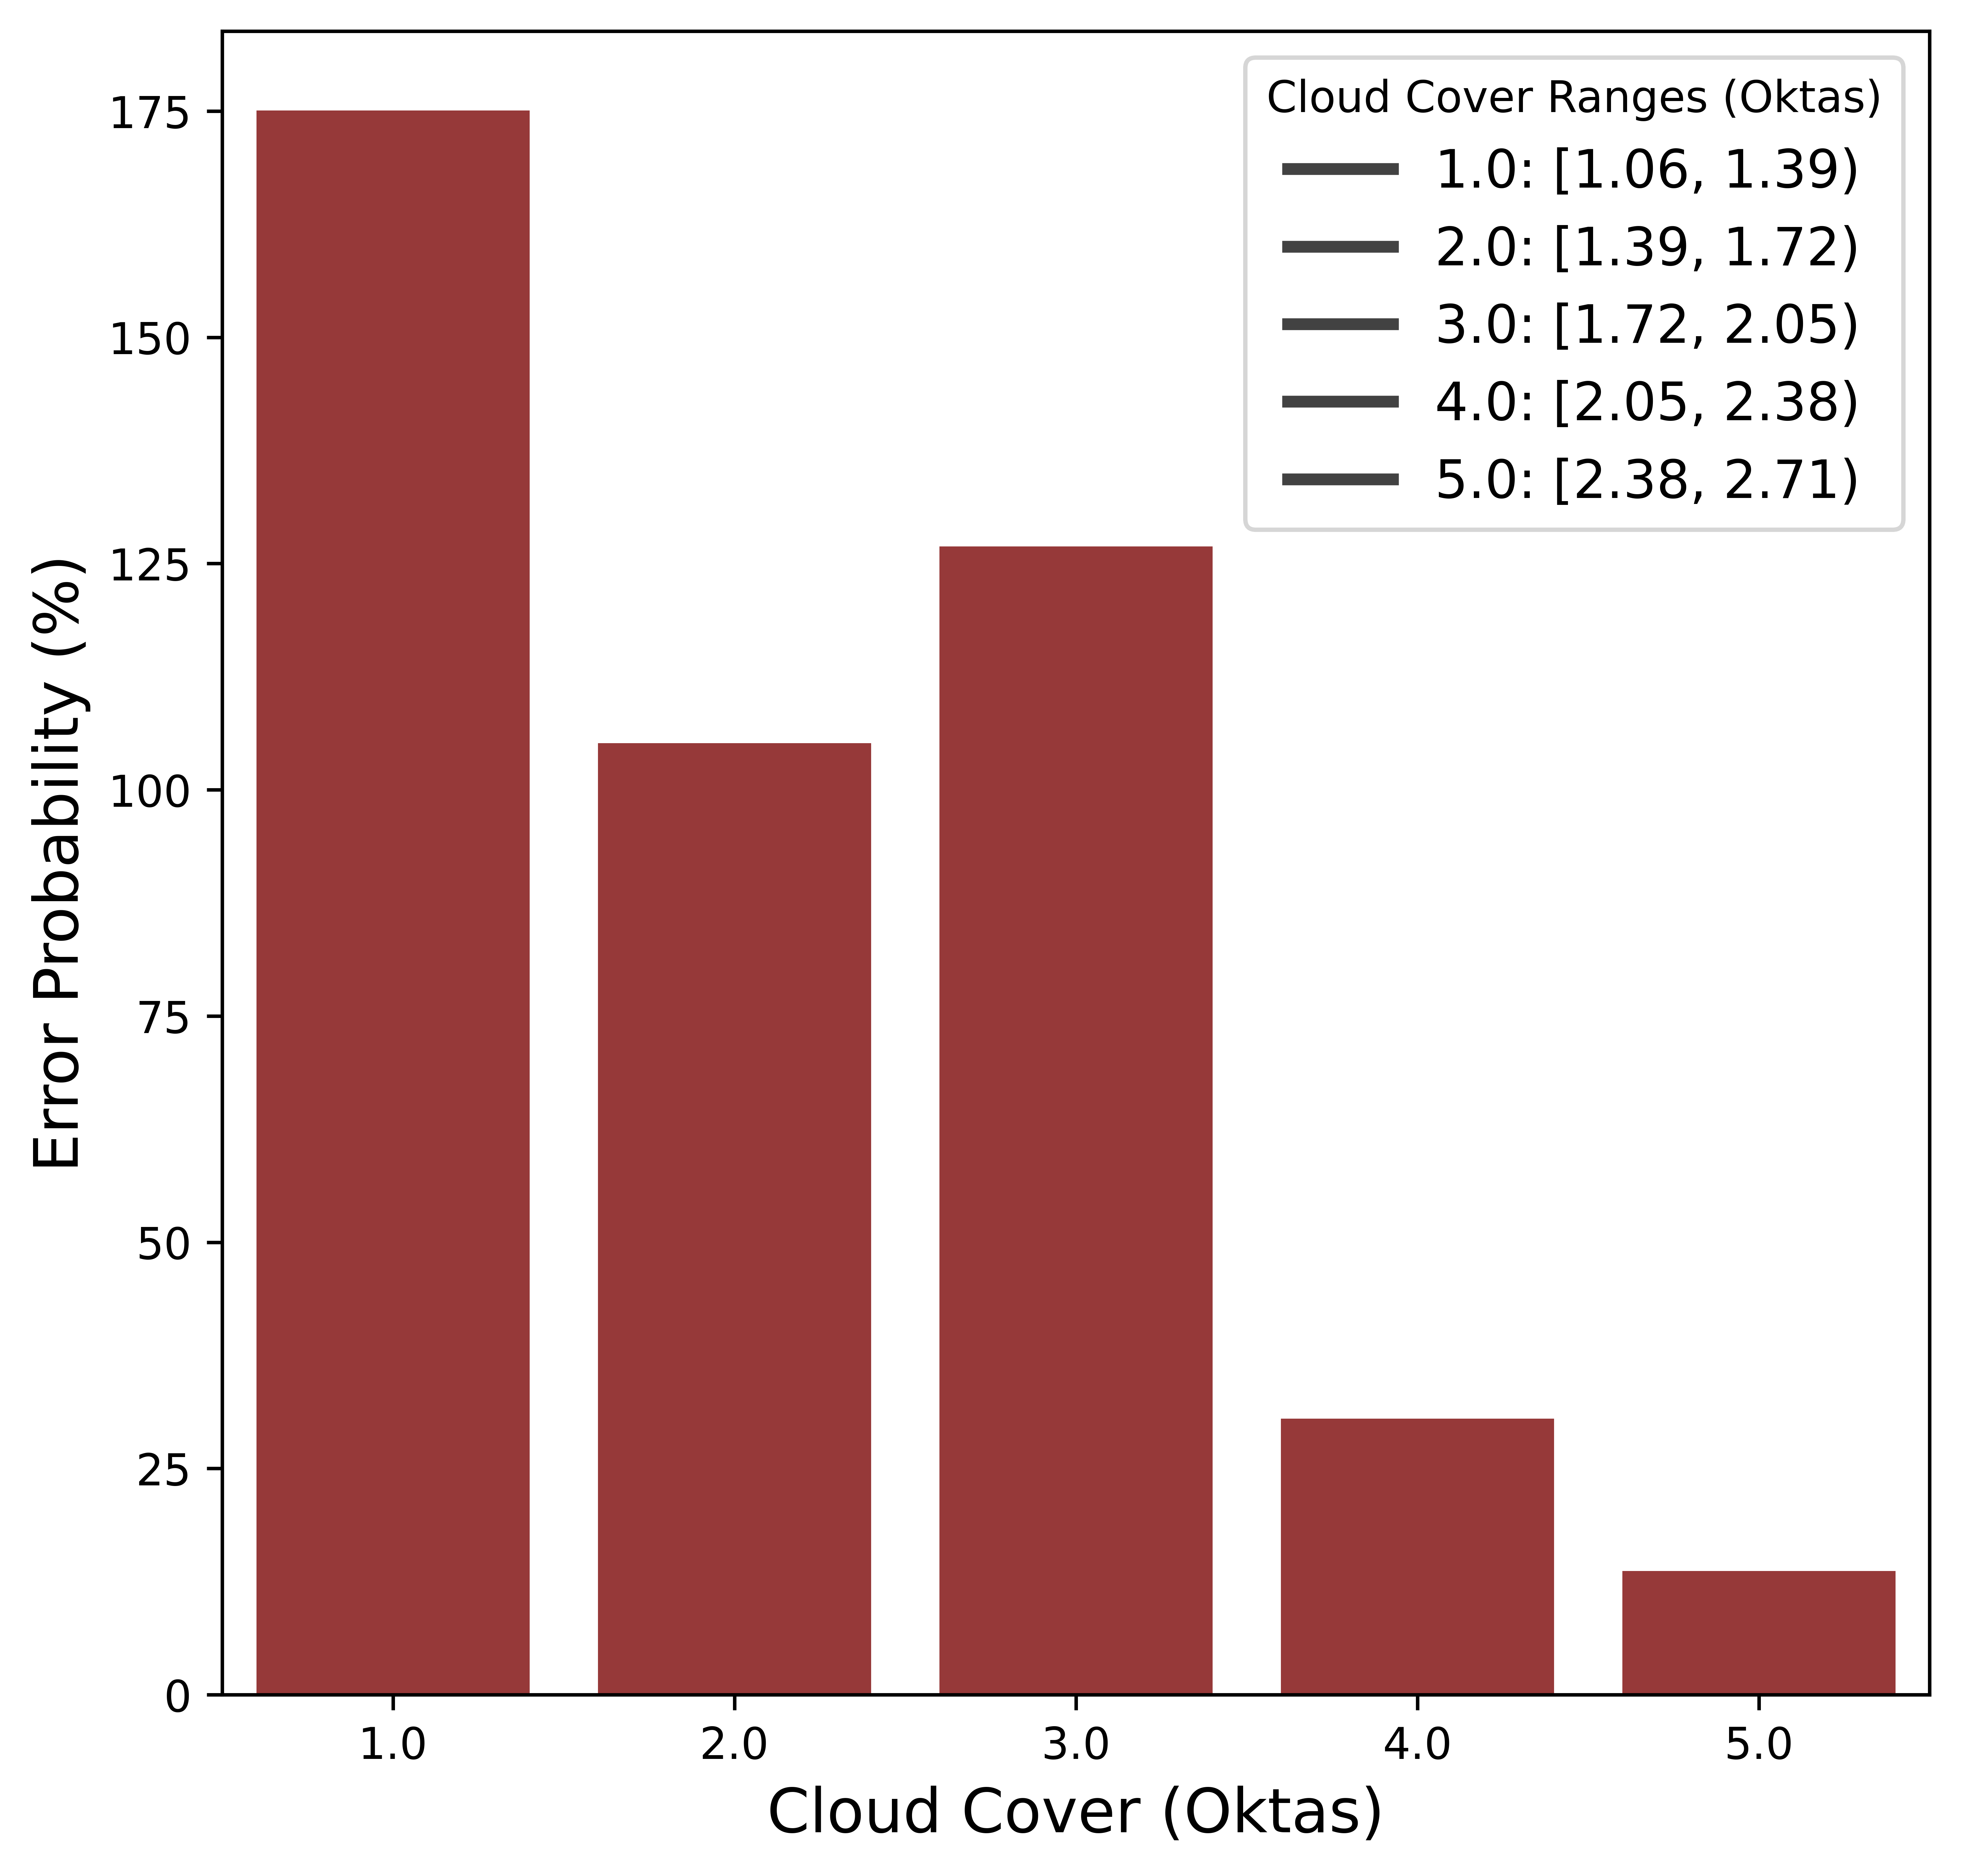

In [506]:
plt.figure(figsize=(7, 7), dpi=1000)
sns.barplot(x=grouped_cloud_cover_svr.index, y='error_probability', data=grouped_cloud_cover_svr, color='brown')

# Create a bar plot using seaborn

plt.xlabel('Cloud Cover (Oktas)', fontsize=14)
plt.ylabel('Error Probability (%)', fontsize=14)
# Manually set legend labels based on index values
legend_labels = {1: '[1.06, 1.39)', 2: '[1.39, 1.72)', 3: '[1.72, 2.05)', 4: '[2.05, 2.38)', 5: '[2.38, 2.71)'}
legend_labels_list = [f"{i}.0: {legend_labels[i]}" for i in range(1, 6)]
# Create colored patches for legend


# Add legend manually
ax = plt.gca()
ax.legend(title='Cloud Cover Ranges (Oktas)', labels=legend_labels_list, loc='upper right', fontsize=12)
#plt.ylim((0,270))
# Add legend
#plt.legend(title='Temperature Ranges (°C)', labels=legend_labels_list, loc='upper left', fontsize=10)
#plt.title('Error Probability Across Temperature Conditions')
plt.savefig('/Users/gloriacarrascal/trabajo-grado/graficas/cloud_cover_error_svr_English_2018.png')

plt.show()